In [1]:
#Stwórz dane z rozkładu normalnego o średniej 3 i odchyleniu standardowym 1 dla 100 oraz 10 000. Na podstawie tych sztucznie stworzonych zbiorów 
#oblicz statystyki poznane w module statystki opisowej. Opisz różnice pomiędzy statystkami i wynik swojej pracy wyślij Mentorowi jako Jupyter Noteboook 
#zapisany w Github.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mean = 3
std_dev = 1

# Generowanie danych z rozkładu normalnego
data_100 = np.random.normal(mean, std_dev, 100)
data_10000 = np.random.normal(mean, std_dev, 10000)

In [2]:
# Tworzenie DataFrame z danymi
df_100 = pd.DataFrame(data_100, columns=["value_100"])
df_10000 = pd.DataFrame(data_10000, columns=["value_10000"])

In [3]:
df_100

,value_100
0,2.321097
1,0.915111
2,3.241232
3,3.327408
4,1.943563
...,...
95,2.594811
96,4.142568
97,3.684212
98,4.344762


In [4]:

df_10000

,value_10000
0,3.737454
1,2.746750
2,3.016873
3,3.290075
4,1.410991
...,...
9995,3.039485
9996,3.282450
9997,4.268136
9998,3.739995


In [5]:
mean_df_100 = round(np.mean(df_100),2)
mean_df_100

np.float64(2.89)

In [6]:
mean_df_10000 = round(np.mean(df_10000),2)
mean_df_10000

np.float64(2.98)

In [7]:
mean_diff= mean_df_100-mean_df_10000
mean_diff

np.float64(-0.08999999999999986)

In [8]:
#Dla obu próbek oczekujemy średniej zbliżonej do 3 i tak to też wygląda. 100 średnia może bardziej odbiegać od wartości teoretycznej z powodu 
#losowych fluktuacji.


median_df_100 = np.median(df_100)
median_df_100

np.float64(2.7548309157494986)

In [9]:
median_df_10000 = np.median(df_10000)
median_df_10000


np.float64(2.9812626815114234)

In [10]:
median_diff = median_df_100 - median_df_10000
median_diff

np.float64(-0.2264317657619248)

In [11]:
# Mediana jest na podobnym poziomie dla obu zbiorów, tak jak możnabyło się spodziewać z racji większej ilości obserwacji mediana dla zbioru 10000 znajduje 
#się bliżej średniej

In [12]:
mode_df_100 = stats.mode(df_100)
mode_df_100

ModeResult(mode=array([0.25441839]), count=array([1.]))

In [13]:
mode_df_10000 = stats.mode(df_10000)
mode_df_10000


ModeResult(mode=array([-0.52835056]), count=array([1.]))

In [14]:
mode_diff = mode_df_100[0] - mode_df_10000[0]
mode_diff
# Co ciekawe dominanta dla 10000 obserwacji jest ujemna, a różnica między dominanta 100 a 1000 wynosi prawie 1. W obu przypadkach domunująca wartość 
#wystepuje jeden raz więc nie ma co zagłębiać się w tą miarę statystyczną.

array([0.78276895])

In [15]:
q0_100 = np.quantile(df_100, 0.0)
q1_100 = np.quantile(df_100, 0.25)
q3_100 = np.quantile(df_100, 0.75)
q4_100 = np.quantile(df_100, 1.0)
print(f'Q0: {q0_100}')
print(f'Q1: {q1_100}')
print(f'Q2: {median_df_100}')
print(f'Q3: {q3_100}')
print(f'Q4: {q4_100}')

Q0: 0.2544183884908602
Q1: 2.239876020055038
Q2: 2.7548309157494986
Q3: 3.6817923803452404
Q4: 5.036859150720639


In [16]:
q0_10000 = np.quantile(df_10000, 0.0)
q1_10000 = np.quantile(df_10000, 0.25)
q3_10000 = np.quantile(df_10000, 0.75)
q4_10000 = np.quantile(df_10000, 1.0)
print(f'Q0: {q0_10000}')
print(f'Q1: {q1_10000}')
print(f'Q2: {median_df_10000}')
print(f'Q3: {q3_10000}')
print(f'Q4: {q4_10000}')

Q0: -0.5283505641070474
Q1: 2.313232387638073
Q2: 2.9812626815114234
Q3: 3.652047416051356
Q4: 6.542707280845574


In [17]:
Q0_diff=q0_100-q0_10000
Q1_diff=q1_100-q1_10000
Q2_diff=median_df_100-median_df_10000
Q3_diff=q3_100-q3_10000
Q4_diff=q4_100-q4_10000
print(f'Q0_diff: {Q0_diff}')
print(f'Q1_diff: {Q1_diff}')
print(f'Q2_diff: {Q2_diff}')
print(f'Q3_diff: {Q3_diff}')
print(f'Q4_diff: {Q4_diff}')

Q0_diff: 0.7827689525979076
Q1_diff: -0.0733563675830351
Q2_diff: -0.2264317657619248
Q3_diff: 0.02974496429388429
Q4_diff: -1.5058481301249351


In [18]:
#największa różnica miedzy 2 zbiorami wystepuje w 0 oraz 4 kwartylu. Wynika to z tego, że przedział 10000 obserwacji jest dłuższy i zawiera więcej 
#obserwacji co sprawia, że jest bardziej wygładzony .

In [28]:
range_100 = df_100.max()[0] - df_100.min()[0]
range_100

C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_22308\1294903444.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  range_100 = df_100.max()[0] - df_100.min()[0]


np.float64(4.782440762229779)

In [29]:
range_10000 = df_10000.max()[0] - df_10000.min()[0]
range_10000

C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_22308\3510169647.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  range_10000 = df_10000.max()[0] - df_10000.min()[0]


np.float64(7.071057844952621)

In [21]:
range_diff = range_100 - range_10000
range_diff
#Dla 10 000 obserwacji zakres wartości wynosi 7+ jednostek, co jest większe niż `5 jednostek dla range_100. 
#Z racji występowania większej ilości obserwacji w zbiorze 10000 zakres jest dłuższy w związku z większą szansą wystąpienia wartości skrajnych, 
#patrz Q0 oraz Q5 

np.float64(-2.2886170827228423)

In [22]:

standard_deviation_100 = np.std(df_100, ddof=1, axis = 0)[0]
print(standard_deviation_100)

0.9553754395693485


C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_22308\3206026110.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  standard_deviation_100 = np.std(df_100, ddof=1, axis = 0)[0]


In [23]:
standard_deviation_10000 = np.std(df_10000, ddof=1, axis = 0)[0]
print(standard_deviation_10000)

0.9898624196325879


C:\Users\DarkRaziel\AppData\Local\Temp\ipykernel_22308\712625622.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  standard_deviation_10000 = np.std(df_10000, ddof=1, axis = 0)[0]


In [24]:
standard_deviation_diff = standard_deviation_100 - standard_deviation_10000
standard_deviation_diff
# W obu przypadkach odchylenie standardowe jest bardzo zbliżone do oczekiwanego =1, podobnie jak w przypadku innych miar większa ilość obserwacji 
#powoduję to że wynik jest bardziej zbliżony do oczekiwanego


np.float64(-0.03448698006323947)

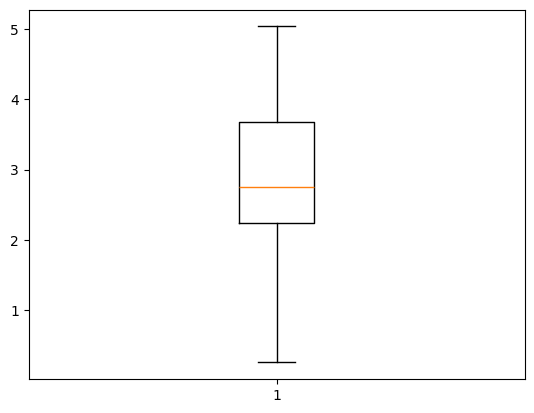

In [25]:
plt.boxplot(df_100)
plt.show()

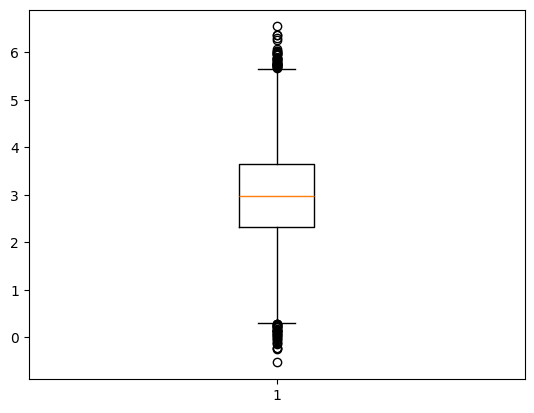

In [26]:
plt.boxplot(df_10000)
plt.show()

In [27]:
#Zbiór 10000 ma znacznie więcej wartości odstających od zbioru 100